# MNIST mit veränderter Modell-Architektur - v.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from keras.optimizers import Adam ,RMSprop

import seaborn as sns

## Einladen des MNIST-Datensatzes, aufteilen und Beispiel anzeigen

In [2]:
# Datensatz angeben
data = keras.datasets.mnist

# Datensatz herunterladen, Aufteilen der Daten in Test- und Trainingsdaten
(train_images, train_labels), (test_images, test_labels) = data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Größe der Trainingsdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print('Training-Datensatz: ', train_images.shape)
# Größe der Testdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print('Test-Datensatz: ', test_images.shape)
# Informationsinhalte der Daten
print(f"Pixelwerte von {np.min(train_images)} bis {np.max(train_images)}.")

Training-Datensatz:  (60000, 28, 28)
Test-Datensatz:  (10000, 28, 28)
Pixelwerte von 0 bis 255.


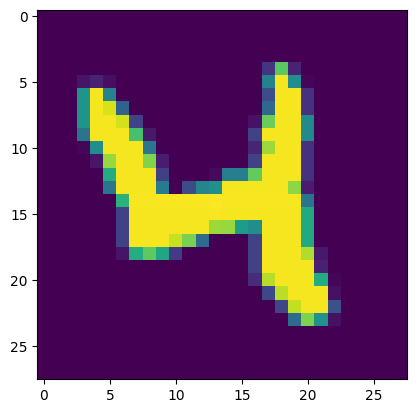

In [4]:
single_image = train_images[20]
plt.imshow(single_image)

## Preprocessing - Umwandlung der Lablels in einen Vektor mit 10 Elementen

In [5]:
from tensorflow.keras.utils import to_categorical
y_example = to_categorical(train_labels)
y_example[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [6]:
labels_cat_test = to_categorical(test_labels,10)
labels_cat_train = to_categorical(train_labels,10)

## Skalieren der Bilder auf Werteberich zwischen 0 und 1

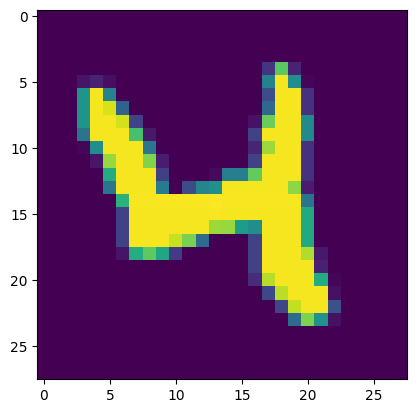

In [7]:
train_images = train_images/255
test_images = test_images/255
plt.imshow(train_images[20])

## Reshaping der Datensätze (Train, Test), Erweiterung um eine Dimension

In [8]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000,28,28,1)
test_images.shape

(10000, 28, 28, 1)

## Modellaufbau

In [9]:
model = Sequential()

# INPUT LAYER
model.add(Input(shape=(28, 28, 1)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# KERAS METRICS FOR REPORT GENERATION
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Output Layer:
* Fehlerfunktion - categorial crossentropy: geeignet für Klassifizierung, prüft "Reinheit" einer Klasse, misst Abweichung zwischer vorhergesagter Wahrscheinlichkeit einer Klasse und der tatsächlichen Klasse
* optimizer - Adam: adaptive Lernratensteuerung (Adaptive Moment Estimation), verbessert Gradient Descent, Vorteil: schnell und generalisiert gut
* metrics - accuracy

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

 Das Training wird automatisch gestoppt, wenn der Validierungsverlust für zwei aufeinanderfolgende Epochen nicht verbessert wird. Dies hilft, Überanpassung zu vermeiden und das Training zu beenden, wenn das Modell nicht mehr von den Daten lernt.

  * monitor='val_loss': Der Monitor gibt an, welche Metrik überwacht werden soll, um zu entscheiden, wann das Training beendet werden soll. In diesem Fall ist es der Validierungsverlust (val_loss). Das Training wird gestoppt, wenn der Validierungsverlust nicht mehr verbessert wird.

  * patience=2: Die Geduld gibt an, wie viele Epochen ohne Verbesserung der überwachten Metrik toleriert werden, bevor das Training gestoppt wird. In diesem Beispiel wird das Training beendet, wenn der Validierungsverlust für zwei aufeinanderfolgende Epochen nicht verbessert wird.

## Modellierung

In [12]:
model.fit(train_images,labels_cat_train,epochs=10,validation_data=(test_images,labels_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9157 - loss: 0.2834 - val_accuracy: 0.9802 - val_loss: 0.0607
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9849 - loss: 0.0483 - val_accuracy: 0.9855 - val_loss: 0.0429
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9904 - loss: 0.0295 - val_accuracy: 0.9858 - val_loss: 0.0385
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9946 - loss: 0.0181 - val_accuracy: 0.9858 - val_loss: 0.0431
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9955 - loss: 0.0135 - val_accuracy: 0.9882 - val_loss: 0.0393


## Modellevaluierung

In [13]:
model.metrics_names

['loss', 'compile_metrics']

In [14]:
losses = pd.DataFrame(model.history.history)
losses.head(6)

,accuracy,loss,val_accuracy,val_loss
0,0.959450,0.136087,0.9802,0.060692
1,0.985633,0.046595,0.9855,0.042916
2,0.989867,0.030438,0.9858,0.038488
3,0.993650,0.020433,0.9858,0.043086
4,0.995000,0.015091,0.9882,0.039260


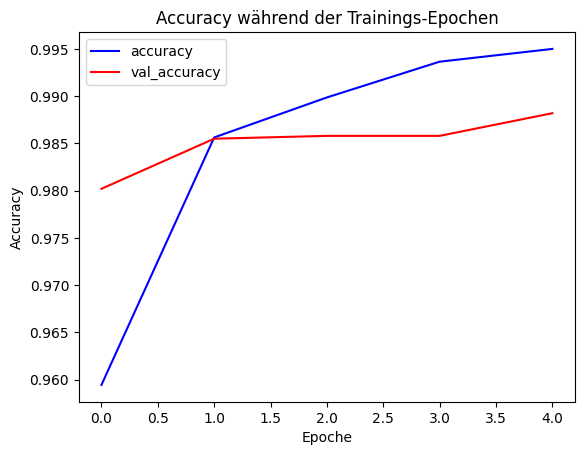

In [15]:
plt.plot(losses['accuracy'], color='b',  label='accuracy')
plt.plot(losses['val_accuracy'], color='r', label='val_accuracy')
plt.title("Accuracy während der Trainings-Epochen")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


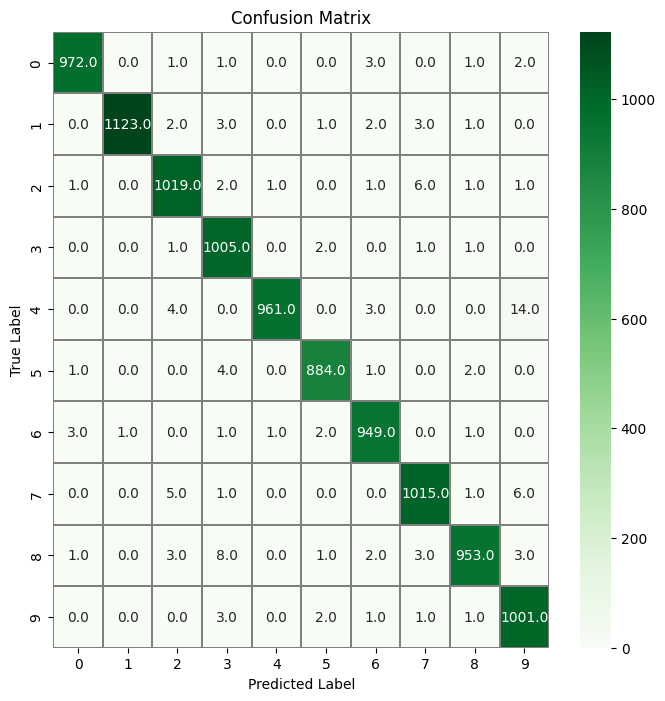

In [16]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_pred_classes
cm=confusion_matrix(test_labels,y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

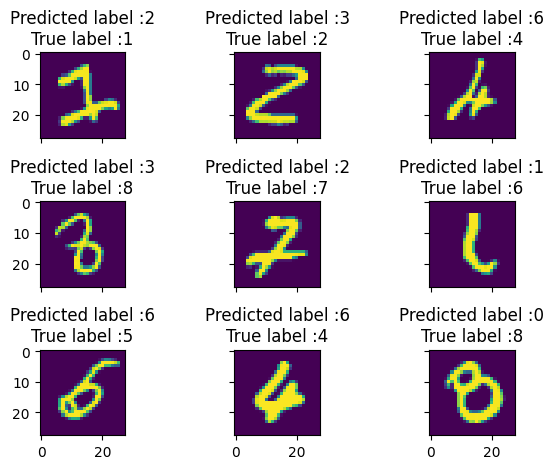

In [17]:
# Fehler sind Unterschiede zwischen y_pred labels and den wahren labels
errors = (y_pred_classes - test_labels != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
test_labels_errors = test_labels[errors]
test_images_errors = test_images[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):

    n = 0
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    fig.tight_layout()

# Wahrscheinlichkeit der falsch erkannten Zahl
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Vorhergesagte Wahrscheinlichkeit der wahren Zahl
true_prob_errors = np.diagonal(np.take(y_pred_errors, test_labels_errors, axis=1))

# Differenz der Wahrscheinlichkeiten
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sortieren der Differenzen
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Top 9 auswählen
most_important_errors = sorted_delta_errors[-9:]
display_errors(most_important_errors, test_images_errors, y_pred_classes_errors, test_labels_errors)